Подключение необходимых библиотек:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import ndcg_score, average_precision_score

### Шаг 1: Подготовка и проверка датасета



1. **Загрузка данных**: Начнем с загрузки данных из файла intern_task.csv и ознакомления с его структурой и содержимым.


In [16]:
df = pd.read_csv('../smallDataset/intern_task_small.csv')

# Посмотрим первые 5 строк данных
df.head()

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000


2. **Изучение данных**: Проанализируем основные статистики данных, проверим наличие пропущенных значений и оценим распределение значений признаков.

**df.describe()**: Этот метод выводит основные статистические характеристики числовых признаков в DataFrame, такие как среднее, стандартное отклонение, минимум, максимум и квартили. Это предоставляет общее представление о распределении числовых данных.

In [3]:
print(df.describe())

             rank    query_id   feature_0   feature_1   feature_2   feature_3  \
count  999.000000  999.000000  999.000000  999.000000  999.000000  999.000000   
mean     0.580581   83.213213    2.443443    0.175175    1.421421    0.443443   
std      0.781335   41.969136    0.762704    0.557644    1.078846    0.724987   
min      0.000000   10.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000   55.000000    2.000000    0.000000    0.000000    0.000000   
50%      0.000000   85.000000    3.000000    0.000000    1.000000    0.000000   
75%      1.000000  115.000000    3.000000    0.000000    2.000000    1.000000   
max      4.000000  160.000000    3.000000    3.000000    3.000000    3.000000   

        feature_4   feature_5  feature_6   feature_7  ...   feature_134  \
count  999.000000  999.000000   999.0000  999.000000  ...    999.000000   
mean     2.459459    0.901401     0.0669    0.537704  ...     42.121121   
std      0.745130    0.240806     0.2109    0

**df.nunique()**: Этот метод возвращает количество уникальных значений для каждого признака в DataFrame. Это полезно для определения количества различных категорий или уровней в категориальных признаках.

In [4]:
print(df.nunique())

rank             5
query_id        11
feature_0        4
feature_1        4
feature_2        4
              ... 
feature_139      5
feature_140    919
feature_141    350
feature_142     92
feature_143    123
Length: 146, dtype: int64


**df.isnull().sum()**: Подсчет количества пропущенных значений по каждому признаку.

rank           0
query_id       0
feature_0      0
feature_1      0
feature_2      0
              ..
feature_139    0
feature_140    0
feature_141    0
feature_142    0
feature_143    0
Length: 146, dtype: int64


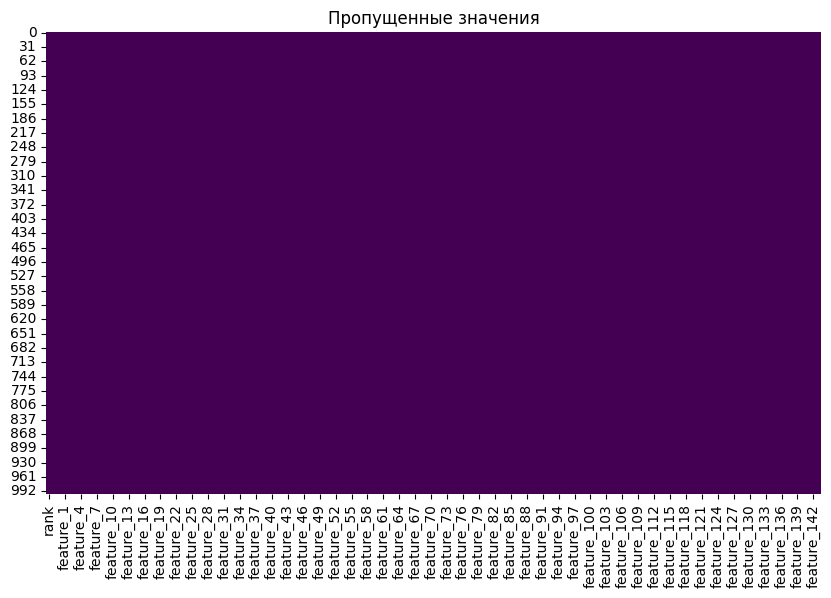

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Пропущенные значения')
plt.show()

Видим, что пропущенных значений не обнаружено, поэтому их обработка не требуется.

Оценка распределения значений признаков:

/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_24531/2796691731.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


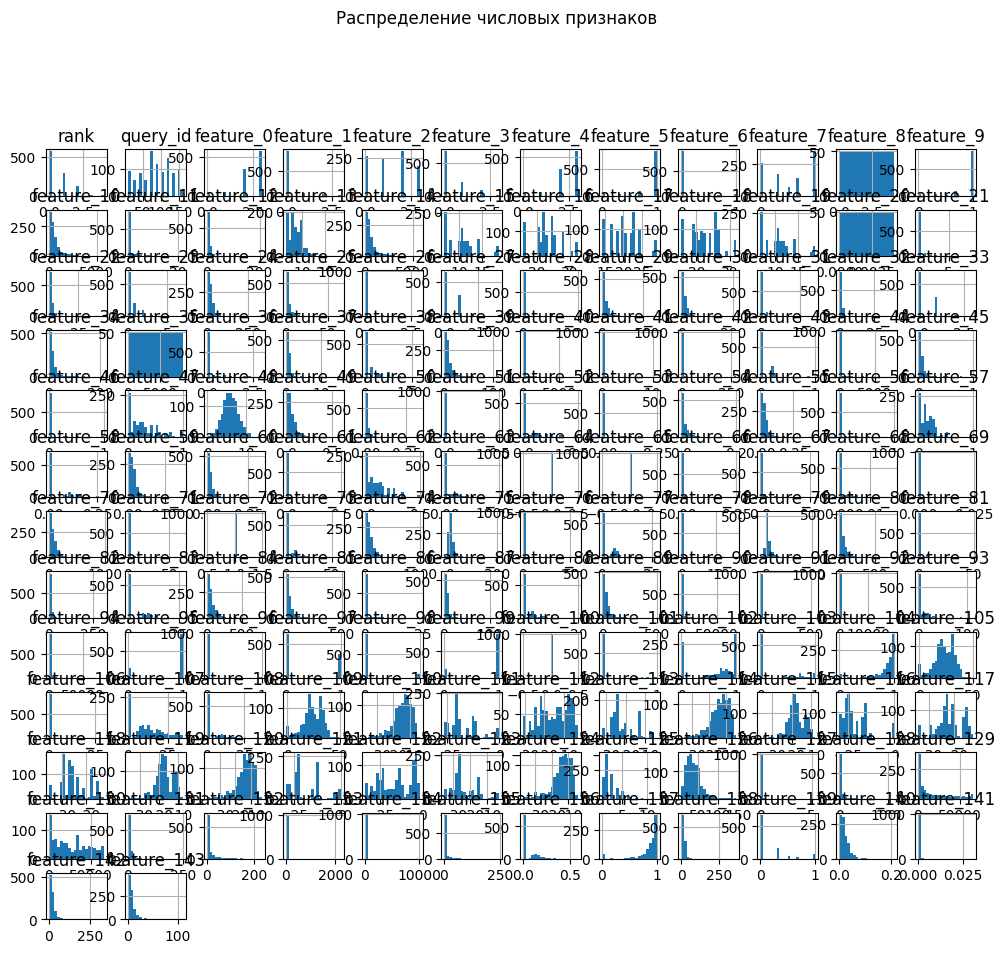

In [6]:
# Визуализация распределения числовых признаков
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Распределение числовых признаков', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

# Визуализация распределения категориальных признаков
for column in df.select_dtypes(include=['object']):
    plt.figure(figsize=(15, 10))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Распределение значений признака {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.xticks(rotation=45)
    plt.show()


3. **Подготовка данных**: Разделим данные на признаки (X) и целевую переменную (y), а затем отмасштабируем признаки.

In [7]:
X = df.drop(columns=['rank', 'query_id'])
y = df['rank']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**df.corr()**: Этот метод вычисляет корреляционную матрицу между числовыми признаками в DataFrame. Корреляция показывает степень линейной зависимости между двумя переменными. Значения корреляции находятся в диапазоне от -1 до 1, где близкие к 1 значения указывают на положительную линейную зависимость, значения близкие к -1 указывают на отрицательную линейную зависимость, а значения близкие к 0 указывают на отсутствие линейной зависимости.

In [8]:
print(df.corr())

                 rank  query_id  feature_0  feature_1  feature_2  feature_3  \
rank         1.000000 -0.029293   0.016483   0.106703   0.252689   0.125243   
query_id    -0.029293  1.000000  -0.049880  -0.003952  -0.049743   0.037428   
feature_0    0.016483 -0.049880   1.000000   0.048054   0.336473  -0.008056   
feature_1    0.106703 -0.003952   0.048054   1.000000   0.140323   0.181913   
feature_2    0.252689 -0.049743   0.336473   0.140323   1.000000   0.175907   
...               ...       ...        ...        ...        ...        ...   
feature_139  0.150132  0.053641  -0.069789   0.175075   0.154001   0.972735   
feature_140  0.237231  0.019176   0.116428   0.069421   0.435297   0.114901   
feature_141  0.025749  0.022922  -0.055093  -0.004696   0.029036  -0.002828   
feature_142  0.079917  0.068344   0.243066   0.181440   0.253191   0.098588   
feature_143  0.115607  0.107989   0.159609   0.188547   0.242399   0.148909   

             feature_4  feature_5  feature_6  featu

Визуализация распределения целевой переменной (rank)

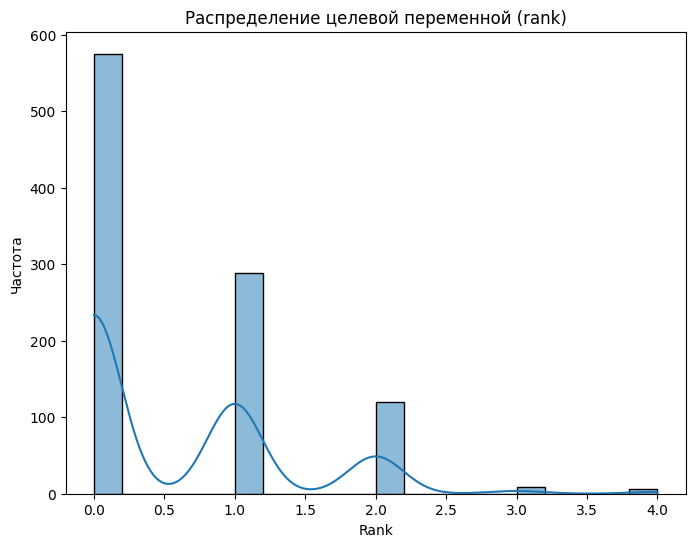

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.title('Распределение целевой переменной (rank)')
plt.xlabel('Rank')
plt.ylabel('Частота')
plt.show()


### Шаг 2: Обучение модели ранжирования


1. **Разделение данных**: Разделим данные на обучающий и тестовый наборы.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

2. **Обучение модели**: Обучим выбранную модель на обучающем наборе данных.

In [11]:
# Создание и обучение модели RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)


### Шаг 3: Оценка модели


1. Получим предсказания рангов на тестовом наборе.

In [12]:
y_pred = rf_model.predict(X_test)

2. **Вычисление метрики ранжирования NDCG (Normalized Discounted Cumulative Gain)**

NDCG оценивает качество ранжирования путем учета как порядка предсказанных результатов, так и их уровня релевантности.

In [13]:
ndcg_5 = ndcg_score(np.expand_dims(y_test, axis=0), np.expand_dims(y_pred, axis=0), k=5)
print("NDCG@5 на тестовом наборе данных:", ndcg_5)

NDCG@5 на тестовом наборе данных: 0.7040901431591895


3. **Вычисление средней точности Mean Average Precision (MAP)**

MAP оценивает качество ранжирования путем вычисления среднего значения точности (Precision) для каждого уровня релевантности истинных меток (ground truth) на заданном числе верхних позиций (rank).

In [14]:
y_test_reshape = np.array(y_test).reshape(-1, 1)
y_pred_reshape = np.array(y_pred).reshape(-1, 1)

map_score = average_precision_score(y_test_reshape, y_pred_reshape)
print(f"Mean Average Precision (MAP): {map_score}")

Mean Average Precision (MAP): 0.3980076206108316


4. **Вычисляем Mean Reciprocal Rank (MRR)**

MRR оценивает качество ранжирования по первому верному результату. Он вычисляется как средний обратный ранг первого верного результата по всем запросам.

In [15]:
def mean_reciprocal_rank(y_true, y_pred):
    # Сортируем индексы предсказанных значений по убыванию вероятности
    sorted_indexes = np.argsort(y_pred)[::-1]
    
    for idx in sorted_indexes:
        # Находим первый индекс, для которого y_true равно 1 (соответствует релевантному результату)
        if y_true[idx] == 1:
            # Возвращаем обратную величину ранга
            return 1 / (idx + 1)
    
    # Если ни один релевантный результат не найден
    return 0

# Вычисляем взаимные ранги
reciprocal_ranks = [mean_reciprocal_rank(y_test, y_pred) for y_test, y_pred in zip(y_test_reshape, y_pred_reshape)]

# Фильтруем значения None (если они есть)
valid_reciprocal_ranks = [rr for rr in reciprocal_ranks if rr is not None]

# Вычисляем среднее значение действительных взаимных рангов
mrr_score = np.mean(valid_reciprocal_ranks)
print(f"Mean Reciprocal Rank (MRR): {mrr_score}")


Mean Reciprocal Rank (MRR): 0.295


### Шаг 4: Сводка результатов

После выполнения всех шагов анализа и обучения модели ранжирования, получены следующие результаты:

1. **Подготовка и проверка датасета**: В процессе подготовки данных были загружены, изучены и предобработаны данные из файла `intern_task_small.csv`. Датасет содержит числовые и категориальные признаки. Пропущенных значений не обнаружено. Распределение признаков визуализировано для оценки характеристик данных.

2. **Обучение модели ранжирования**: Данные были разделены на обучающий и тестовый наборы. Затем была обучена модель `RandomForestRegressor` на отмасштабированных признаках.

3. **Оценка модели**:
    - **NDCG@5 (Normalized Discounted Cumulative Gain)**: Получено значение NDCG@5 на тестовом наборе данных.
    - **MAP (Mean Average Precision)**: Рассчитано среднее значение точности модели.
    - **MRR (Mean Reciprocal Rank)**: Вычислено среднее взаимное значение рангов первого верного результата.
    ---
    - NDCG@5 на тестовом наборе данных: 0.7040901431591895
    - Mean Average Precision (MAP): 0.3980076206108316
    - Mean Reciprocal Rank (MRR): 0.295